# SVM

1) Prepare a classification model using SVM for salary data <br>

Data Description:<br>

age -- age of a person<br>
workclass	-- A work class is a grouping of work <br>
education	-- Education of an individuals<br>
maritalstatus -- Marital status of an individulas<br>
occupation	 -- occupation of an individuals<br>
relationship -- <br>
race --  Race of an Individual<br>
sex --  Gender of an Individual<br>
capitalgain --  profit received from the sale of an investment<br>
capitalloss	-- A decrease in the value of a capital asset<br>
hoursperweek -- number of hours work per week<br>
native -- Native of an individual<br>
Salary -- salary of an individual
<br>

# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salarytrain = pd.read_csv('SalaryData_Train.csv')
salarytrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salarytest = pd.read_csv('SalaryData_Test.csv')
salarytest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA for Salary train dataset

In [5]:
salarytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salarytrain.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
#duplicates
salarytrain[salarytrain.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
salarytrain.shape

(30161, 14)

In [9]:
salarytrain = salarytrain.drop_duplicates()
salarytrain.shape

(26903, 14)

In [10]:
salarytrain.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Visualization for Salary train dataset

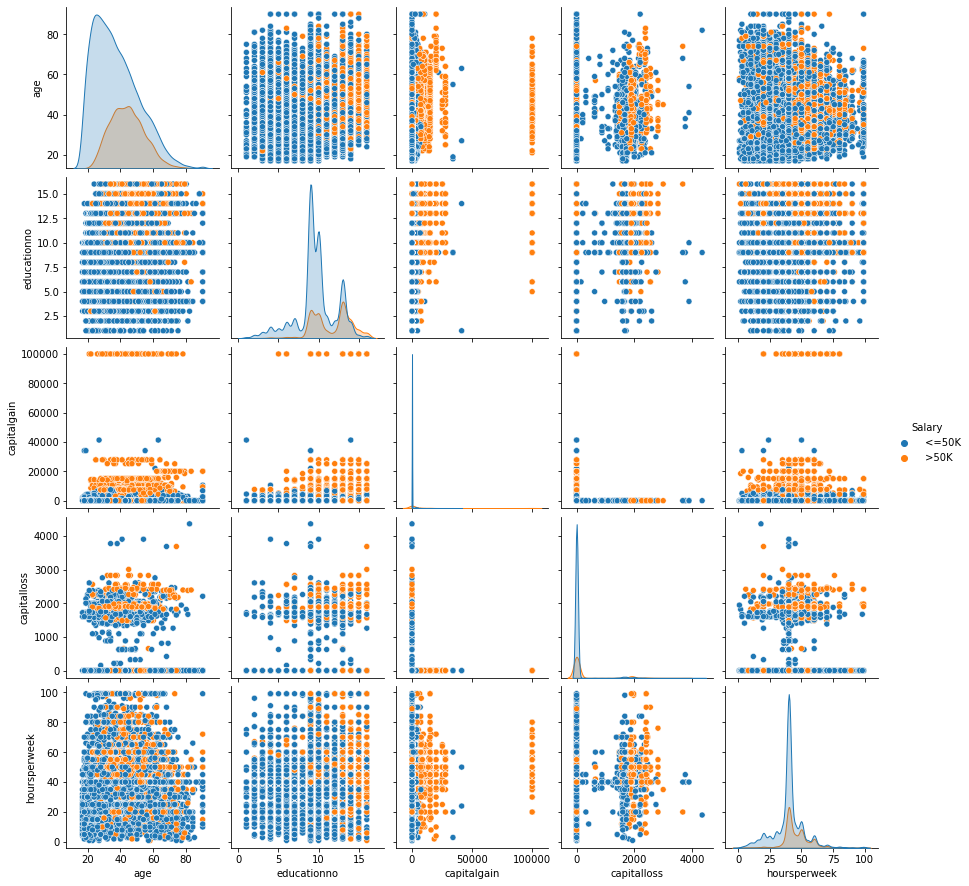

In [12]:
sns.pairplot(salarytrain, hue = 'Salary')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

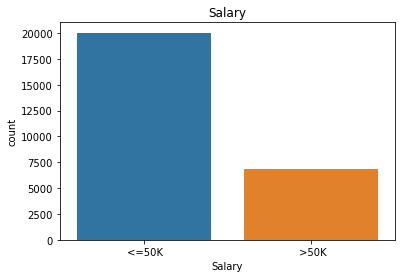

In [13]:
sns.countplot(salarytrain["Salary"])
plt.title("Salary")
salarytrain["Salary"].value_counts()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

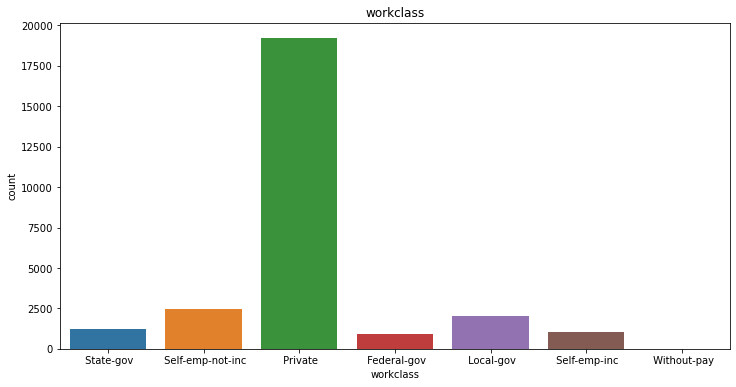

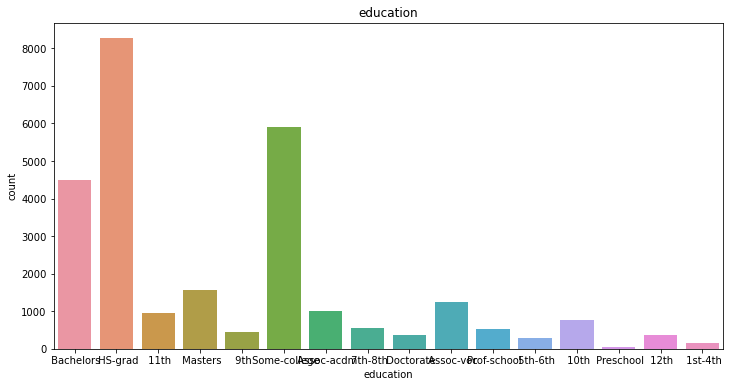

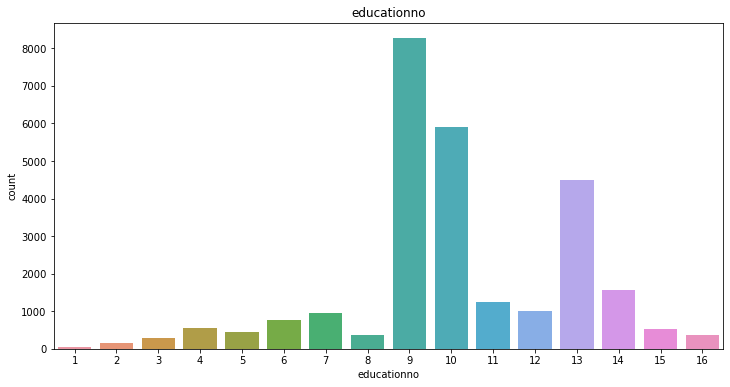

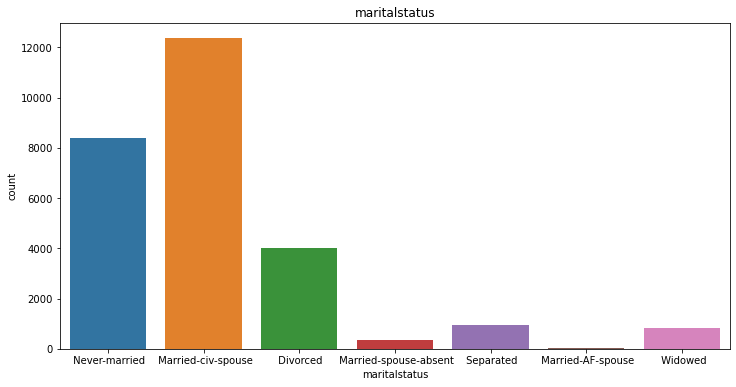

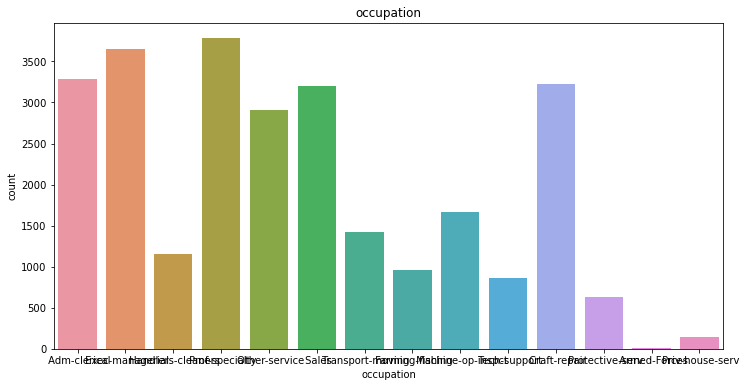

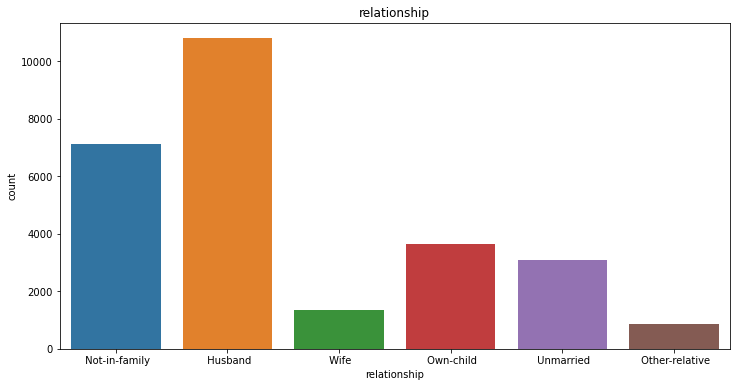

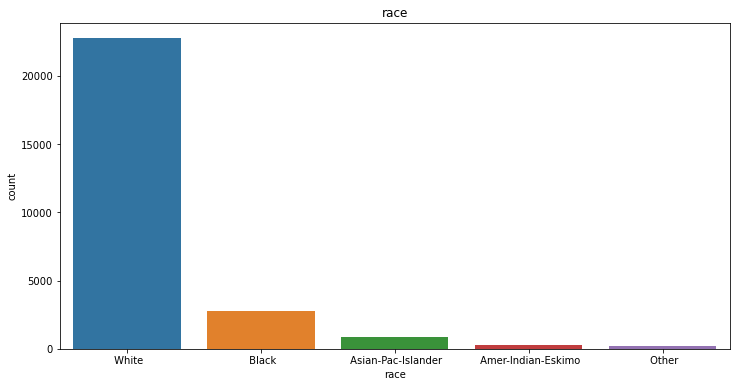

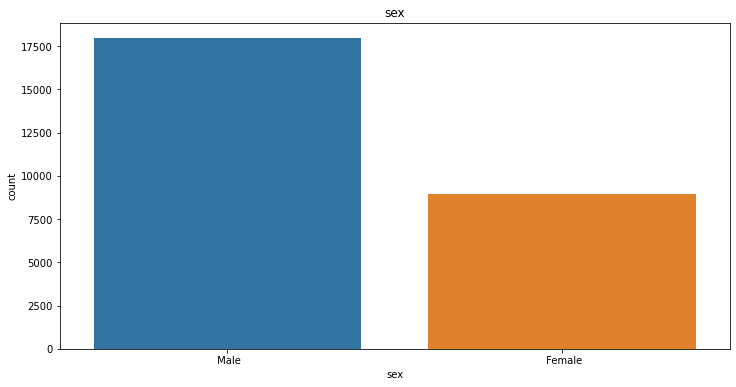

In [14]:
categ = ["workclass","education","educationno","maritalstatus","occupation","relationship","race","sex"]
for col in categ:
    plt.figure(figsize = (12,6))
    sns.countplot(salarytrain[col])
    plt.title(col)

# PPScore for Salary train dataset

In [15]:
import ppscore as pps
pps.matrix(salarytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least popu

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000e+00,classification,True,weighted F1,0.608093,0.608041,DecisionTreeClassifier()
2,age,education,1.652316e-02,classification,True,weighted F1,0.191000,0.204367,DecisionTreeClassifier()
3,age,educationno,0.000000e+00,regression,True,mean absolute error,1.931400,1.983469,DecisionTreeRegressor()
4,age,maritalstatus,2.855628e-01,classification,True,weighted F1,0.332800,0.523328,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
191,Salary,capitalgain,0.000000e+00,regression,True,mean absolute error,1259.274400,1989.698523,DecisionTreeRegressor()
192,Salary,capitalloss,0.000000e+00,regression,True,mean absolute error,100.362200,185.118647,DecisionTreeRegressor()
193,Salary,hoursperweek,0.000000e+00,regression,True,mean absolute error,7.280000,7.488119,DecisionTreeRegressor()
194,Salary,native,2.346882e-07,classification,True,weighted F1,0.850608,0.850608,DecisionTreeClassifier()


# Label encoding for Salary train dataset

In [16]:
from sklearn.preprocessing import LabelEncoder
salarytrain["workclass"] = LabelEncoder().fit_transform(salarytrain["workclass"])
salarytrain["native"] = LabelEncoder().fit_transform(salarytrain["native"])
salarytrain["education"] = LabelEncoder().fit_transform(salarytrain["education"])
salarytrain["maritalstatus"] = LabelEncoder().fit_transform(salarytrain["maritalstatus"])
salarytrain["occupation"] = LabelEncoder().fit_transform(salarytrain["occupation"])
salarytrain["relationship"] = LabelEncoder().fit_transform(salarytrain["relationship"])
salarytrain["race"] = LabelEncoder().fit_transform(salarytrain["race"])
salarytrain["sex"] = LabelEncoder().fit_transform(salarytrain["sex"])
salarytrain["Salary"] = LabelEncoder().fit_transform(salarytrain["Salary"])
salarytrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# Feature Engineering for Salary train dataset

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X_train = salarytrain.drop(["Salary"],axis = 1)
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [18]:
Y_train = salarytrain.iloc[:,-1]
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int32

In [19]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,6).fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

In [20]:
# Feature Ranking:
fit.ranking_

array([1, 1, 6, 1, 1, 3, 1, 5, 1, 8, 7, 2, 4])

In [21]:
X_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37


In [22]:
#Selecting top 5 Features i.e. dropping 6,7 and 8.
X_train_feat = X_train.drop(["education","capitalgain","capitalloss"], axis=1)
X_train_feat.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native
0,39,5,13,4,0,1,4,1,40,37
1,50,4,13,2,3,0,4,1,13,37
2,38,2,9,0,5,1,4,1,40,37
3,53,2,7,2,5,0,2,1,40,37
4,28,2,13,2,9,5,2,0,40,4


# EDA for Salary Test Dataset

In [23]:
# Finding Duplicate Rows.
salarytest[salarytest.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [24]:
# Droping all Duplicated Rows. 
salarytest = salarytest.drop_duplicates()
salarytest.shape

(14130, 14)

In [25]:
salarytest.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Visualization for salary test dataset

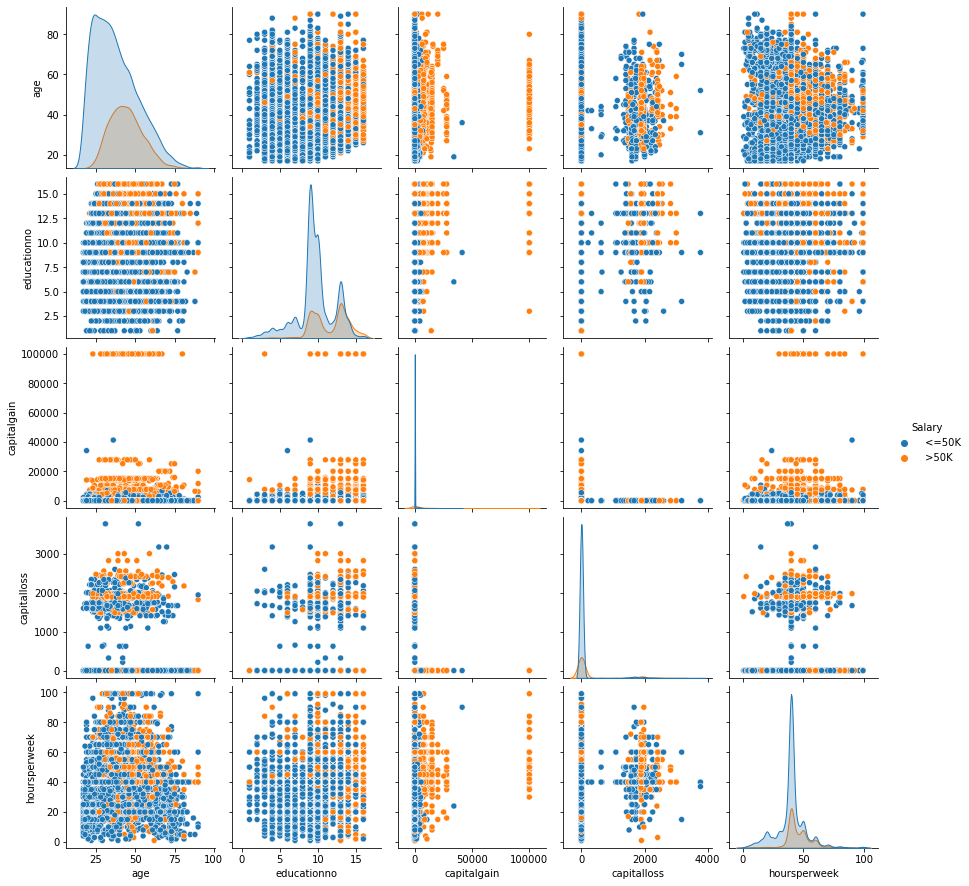

In [26]:
sns.pairplot(salarytest,hue = "Salary")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

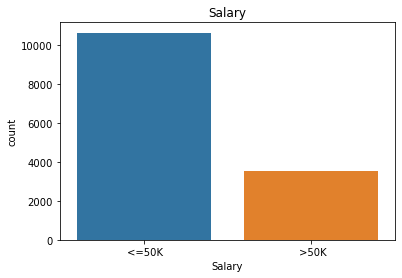

In [27]:
sns.countplot(salarytest["Salary"])
plt.title("Salary")
salarytest["Salary"].value_counts()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

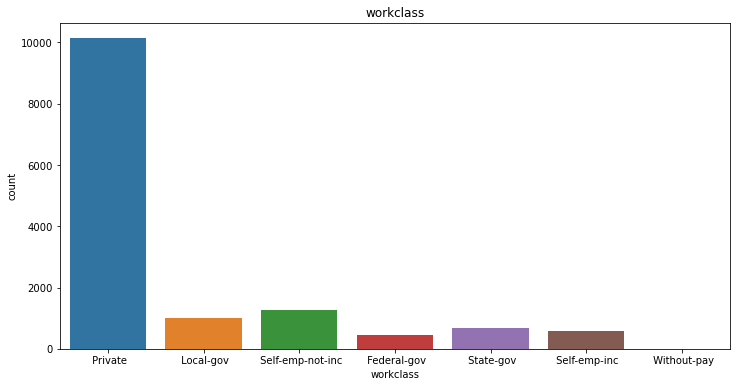

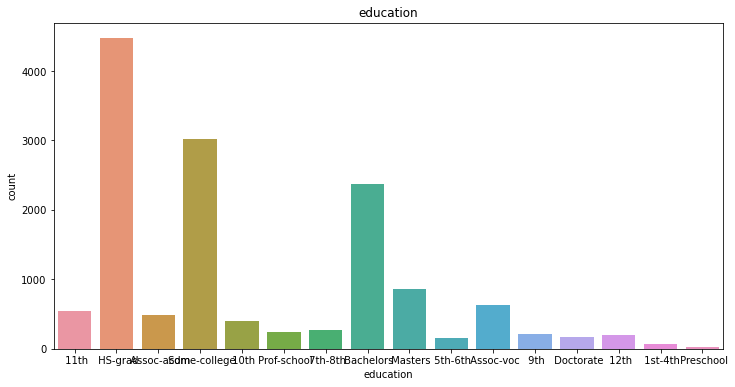

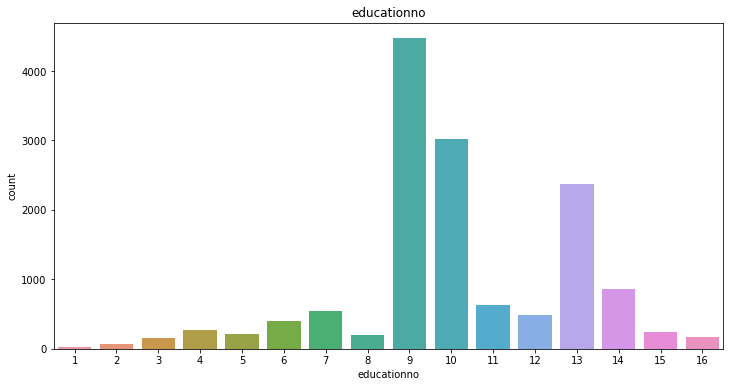

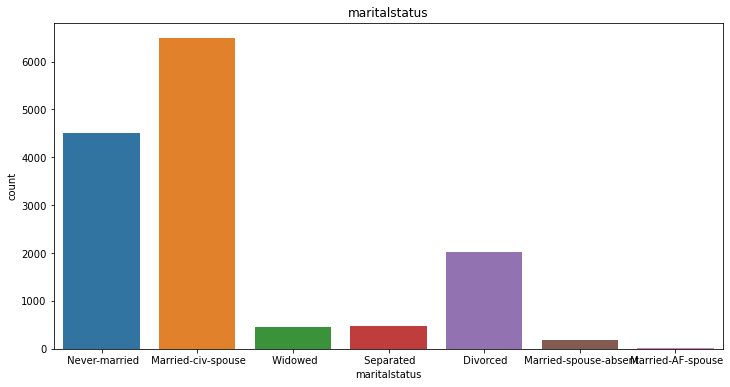

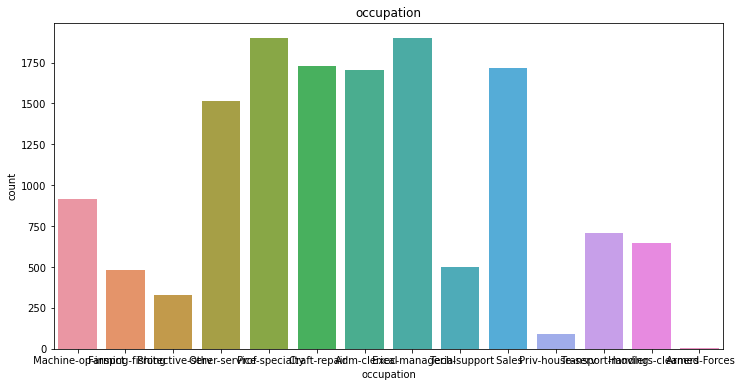

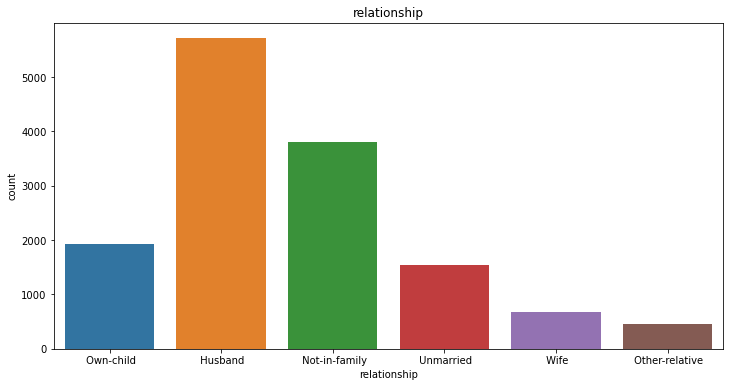

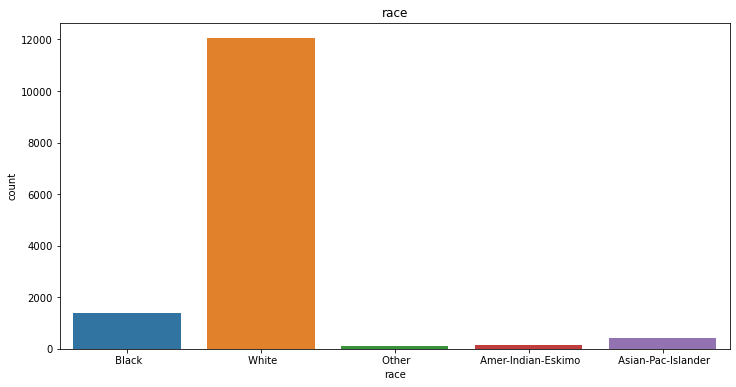

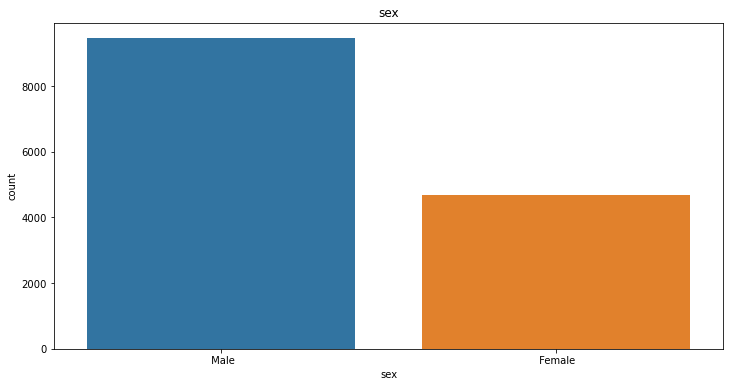

In [28]:
categ = ["workclass","education","educationno","maritalstatus","occupation","relationship","race","sex"]
for col in categ:
    plt.figure(figsize = (12,6))
    sns.countplot(salarytest[col])
    plt.title(col)

# PPScore for Salary test dataset

In [29]:
import ppscore as pps
pps.matrix(salarytest)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least popu

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,2.408102e-04,classification,True,weighted F1,0.596445,0.596542,DecisionTreeClassifier()
2,age,education,4.973549e-02,classification,True,weighted F1,0.188000,0.228385,DecisionTreeClassifier()
3,age,educationno,0.000000e+00,regression,True,mean absolute error,1.924200,1.964791,DecisionTreeRegressor()
4,age,maritalstatus,3.081891e-01,classification,True,weighted F1,0.334800,0.539807,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
191,Salary,capitalgain,0.000000e+00,regression,True,mean absolute error,1270.401800,2046.658147,DecisionTreeRegressor()
192,Salary,capitalloss,0.000000e+00,regression,True,mean absolute error,89.474000,166.856414,DecisionTreeRegressor()
193,Salary,hoursperweek,0.000000e+00,regression,True,mean absolute error,7.526200,7.751316,DecisionTreeRegressor()
194,Salary,native,2.606210e-07,classification,True,weighted F1,0.867992,0.867992,DecisionTreeClassifier()


# Label encoding for Salary test dataset

In [30]:
from sklearn.preprocessing import LabelEncoder
salarytest["workclass"] = LabelEncoder().fit_transform(salarytest["workclass"])
salarytest["native"] = LabelEncoder().fit_transform(salarytest["native"])
salarytest["education"] = LabelEncoder().fit_transform(salarytest["education"])
salarytest["maritalstatus"] = LabelEncoder().fit_transform(salarytest["maritalstatus"])
salarytest["occupation"] = LabelEncoder().fit_transform(salarytest["occupation"])
salarytest["relationship"] = LabelEncoder().fit_transform(salarytest["relationship"])
salarytest["race"] = LabelEncoder().fit_transform(salarytest["race"])
salarytest["sex"] = LabelEncoder().fit_transform(salarytest["sex"])
salarytest["Salary"] = LabelEncoder().fit_transform(salarytest["Salary"])
salarytest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


# Feature engineering for test dataset

In [31]:
X_test = salarytest.drop(["Salary"],axis = 1)
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37


In [32]:
Y_test = salarytest.iloc[:,-1]
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int32

In [33]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,6).fit(X_test, Y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

In [34]:
# Feature Ranking:
fit.ranking_

array([2, 1, 6, 1, 1, 5, 1, 1, 1, 8, 7, 3, 4])

In [35]:
X_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37


In [36]:
# Selecting only top 5 features i.e. dropping, 6,7 and 8
X_test_feat = X_test.drop(["education","capitalgain","capitalloss"], axis=1)
X_test_feat.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native
0,25,2,7,4,6,3,2,1,40,37
1,38,2,9,2,4,0,4,1,50,37
2,28,1,12,2,10,0,4,1,40,37
3,44,2,10,2,6,0,2,1,40,37
4,34,2,6,4,7,1,4,1,30,37


In [37]:
x_train = X_train_feat
y_train = Y_train
x_test = X_test_feat
y_test = Y_test

In [38]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((26903, 10), (26903,), (14130, 10), (14130,))

# Model Building

In [39]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
model1 = SVC()

In [44]:
model1.fit(x_train, y_train)

SVC()

In [45]:
y_pred1 = model1.predict(x_test)
y_pred1 

array([0, 0, 0, ..., 1, 0, 1])

In [46]:
accuracy_score(y_test,y_pred1)

0.7980184005661712

# Grid Search CV

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [48]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [51]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.754 total time= 2.0min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.759 total time= 1.9min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time= 1.8min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.755 total time= 1.9min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.758 total time= 1.9min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.807 total time=  49.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.806 total time=  49.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.802 total time=  56.9s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.808 total time=  48.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.804 total time=  56.9s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.802 total time=  19.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .........C=20, gamma=1, kernel=rbf;, score=0.761 total time= 2.3min
[CV 3/5] END .........C=20, gamma=1, kernel=rbf;, score=0.758 total time= 2.3min
[CV 4/5] END .........C=20, gamma=1, kernel=rbf;, score=0.761 total time= 2.3min
[CV 5/5] END .........C=20, gamma=1, kernel=rbf;, score=0.763 total time= 2.3min
[CV 1/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.773 total time= 1.6min
[CV 2/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.778 total time= 1.4min
[CV 3/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.780 total time= 1.6min
[CV 4/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.783 total time= 1.6min
[CV 5/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.772 total time= 1.6min
[CV 1/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.811 total time=  28.0s
[CV 2/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.809 total time=  27.8s
[CV 3/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.809 total time=  27.6s
[CV 4/5] END ......C=20, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [52]:
print("Best Hyperparameter:-",grid.best_params_,"\n",
      "Best Accuracy Score:-",grid.best_score_)

Best Hyperparameter:- {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 
 Best Accuracy Score:- 0.8122515473347294


# Building SVM model

In [54]:
Final_model = SVC()
Final_model.fit(x_train,y_train)

SVC()

# Predicting Model

In [55]:
y_pred = Final_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

# Model Evaluation

In [56]:
#Model Accuracy
accuracy_score(y_test,y_pred)

0.7980184005661712

In [57]:
print("Model Accuracy:-",(Final_model.score(x_test,y_test))*100,"%")

Model Accuracy:- 79.80184005661712 %
